<a href="https://colab.research.google.com/github/YagyanshB/Machine-Learning-Projects/blob/main/Water_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [19]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [20]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [21]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [22]:
data = data.dropna()

In [23]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [24]:
data['Potability'].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

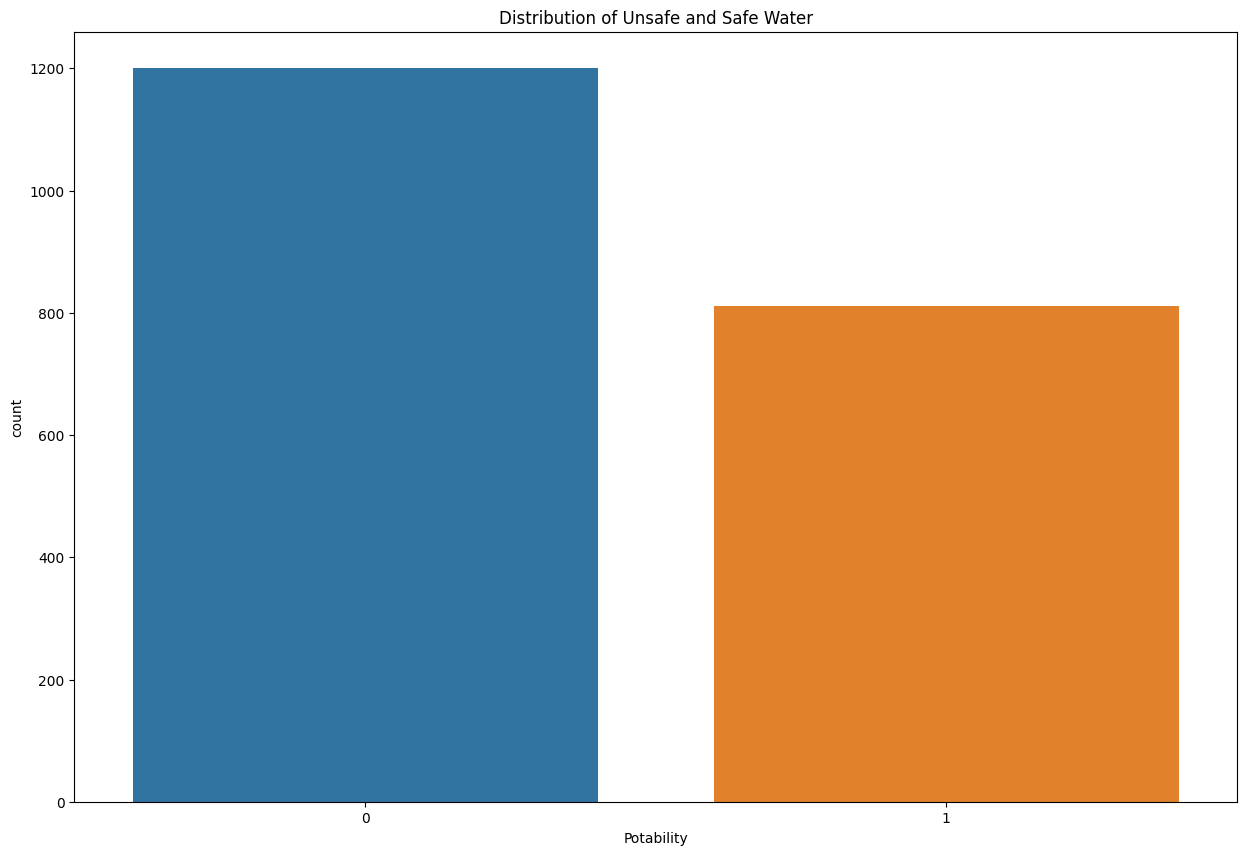

In [30]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Potability', data=data)

plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [31]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

In [32]:
figure = px.histogram(data, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

In [33]:
!pip install PyCaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 28.9 MB/s eta 0:00:00


In [35]:
from pycaret.classification import *
clf = setup(data, target = "Potability", session_id = 786)
compare_models()

,Description,Value
0,Session id,786
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(2011, 10)"
4,Transformed data shape,"(2011, 10)"
5,Transformed train set shape,"(1407, 10)"
6,Transformed test set shape,"(604, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6802,0.6956,0.3952,0.6778,0.4977,0.2870,0.3100,0.4960
rf,Random Forest Classifier,0.6780,0.6844,0.4040,0.6696,0.5024,0.2854,0.3063,0.7530
qda,Quadratic Discriminant Analysis,0.6745,0.7091,0.3866,0.6795,0.4879,0.2746,0.3013,0.0530
gbc,Gradient Boosting Classifier,0.6489,0.6554,0.3581,0.6232,0.4505,0.2186,0.2397,0.7510
lightgbm,Light Gradient Boosting Machine,0.6432,0.6658,0.4869,0.5719,0.5232,0.2416,0.2453,0.3710
xgboost,Extreme Gradient Boosting,0.6389,0.6581,0.4744,0.5629,0.5129,0.2301,0.2331,0.4720
nb,Naive Bayes,0.6212,0.6280,0.2506,0.5728,0.3474,0.1344,0.1581,0.1080
ridge,Ridge Classifier,0.5984,0.0000,0.0282,0.6267,0.0534,0.0137,0.0499,0.1580
lda,Linear Discriminant Analysis,0.5970,0.5189,0.0299,0.5867,0.0564,0.0115,0.0421,0.0560
dummy,Dummy Classifier,0.5970,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=786, verbose=0, warm_start=False)